# Meme as a strategy

***
For years, financial analysts have valued **Tesla** as a "car company". **Ark Investment** famously positioned Tesla as a "Tech company", soon to become an autonomous ride-hailing platform. Nowadays, the branding of Tesla is evolving into a luxury brand with lifestyle clothing, branded goodies, and even an exclusive Tequila brand.

Empowered by 47M followers on Twitter, **Elon Musk** is using the most powerful strategy in the digital space, Meme. This preliminary research will try to understand the behaviors of the popular American CEO and the overall impact on the brand. 

We will have a look at his activity on Twitter from April 17th to December 31st 2020, try to discover some fresh insights, launch a quick sentiment analysis in NLP using NLTK (Vader), create a time series on the scores, and rank his most popular tweets.

In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

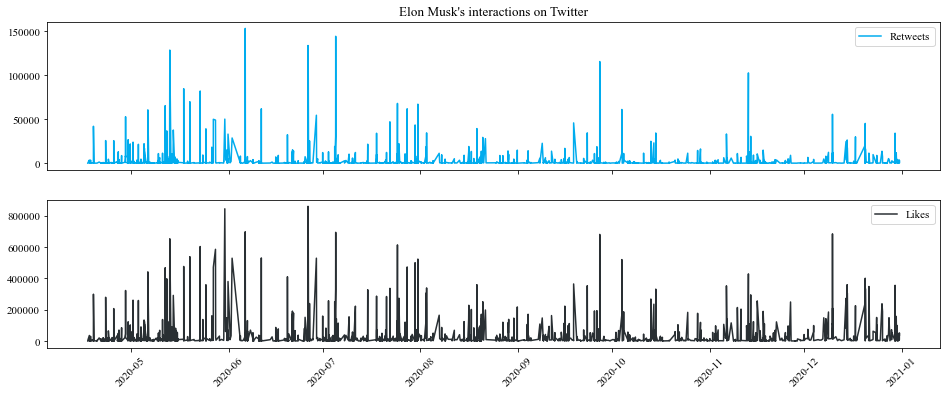

In [2]:
df = pd.read_csv('elonmusk.csv',sep=";",quotechar='"',index_col='created_at', parse_dates=True)

rt = df['retweet_count']
fav = df['likes_count']

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

fig, (ax1, ax2) = plt.subplots(2,figsize=(16,6), sharex=True)
ax1.set_title("Elon Musk's interactions on Twitter")
ax1.plot(rt,color='#00acee',label='Retweets')
ax1.legend()
ax2.plot(fav,color='#292f33',label='Likes')
ax2.legend() 
plt.xticks(rotation=45)
plt.show()

## Twitter metrics
Looking at the metrics, Elon Musk have a powerful engagement rate on a monthly basis with an extremely large network size. We can see a good average with multiple important spikes. **“Retweet”** and **“Likes”** are the most important metrics on Twitter. Those metrics are implying a positive interaction. Retweet is on a **higher emotional level** since it’s providing a real echo chamber.

## NLTK + Vader

We will be using **NLTK** (Natural Language Toolkit) and **VADER** (Valence Aware Dictionary for sEntiment Reasoning) that provide great results on overall precision, recall and F1 score for social media text. The first step of NLP is to remove digital "imperfections" from the text and transform it into the cleanest text possible in order to obtain the most accurate model for prediction.

In [3]:
df.tail(3)

,tweet,retweet_count,likes_count,reply_count,quote_count
created_at,,,,,
2020-12-31 05:19:34+00:00,@jack 🎩 The Greatest Gatsby 🎩,398,9327,408,71
2020-12-31 05:40:26+00:00,Great interview with Mathias Döpfner https://t...,3275,52259,1670,471
2020-12-31 05:47:38+00:00,Ignore the heading,735,38091,1161,64


In this initial data frame, we can observe various key elements on social media exchange:
-	**Emojis** - Human are using emojis to express a feeling
-	**Capital letters** - Capital letters are playing an important role in linguistic
-	**Hyperlinks** - Hyperlinks are providing more context to a short 140 character tweet
-	**Abstract** - Abstract sentences can be subject to interpretation

Those elements are often deleted during the preprocessing of text in machine learning. We will not removed capital letters and punctuations. We will transform emojis into words. We will clean html tags and hyperlinks, while keeping them in the original data frame. And we will let Vader handle stop words, punctuations, and capital letters. 

Ps: While Vader recommends sentence tokenization, stemming, and lemmatization. During my testing, the polarity score didn’t improve much, maybe due to short sentences on Twitter.

In [4]:
import re
import emoji

def clean_tweet(tweet):
    clean_tweet = tweet
    clean_tweet = emoji.demojize(clean_tweet, delimiters=("", " "))
    clean_tweet = clean_tweet.replace('_', " ")
    clean_tweet = clean_tweet.replace('&amp;', "and") 
    clean_tweet = clean_tweet.replace('\n', " ")
    clean_tweet = clean_tweet.replace('@', "")
    clean_tweet = re.sub(r"http\S+", "", clean_tweet)
    clean_tweet = ' '.join(re.sub("(\w+:\/\/\S+_)", "", clean_tweet).split())
    return(clean_tweet)

df['cleaned_tweet'] = df['tweet'].apply(lambda x: clean_tweet(x))
df.tail(3)

,tweet,retweet_count,likes_count,reply_count,quote_count,cleaned_tweet
created_at,,,,,,
2020-12-31 05:19:34+00:00,@jack 🎩 The Greatest Gatsby 🎩,398,9327,408,71,jack top hat The Greatest Gatsby top hat
2020-12-31 05:40:26+00:00,Great interview with Mathias Döpfner https://t...,3275,52259,1670,471,Great interview with Mathias Döpfner
2020-12-31 05:47:38+00:00,Ignore the heading,735,38091,1161,64,Ignore the heading


## Positive, neutral or negative

The compound polarity score is computed by summing the valence scores of each word, and then normalize to be between extreme negative at -1 to the most extreme positive +1, with neutral point at 0. 

If $x$ is the sum of mean valence scores for all words in the tweet and $\alpha$ a normalization (default) hyperparameter valued at 15 then:

$$ Score = {\frac{{x}}
{\sqrt{x^2 + \alpha}}} $$

In [5]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [6]:
df['neg'] = df['cleaned_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df['neu'] = df['cleaned_tweet'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df['pos'] = df['cleaned_tweet'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df['compound'] = df['cleaned_tweet'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df.tail(3)

,tweet,retweet_count,likes_count,reply_count,quote_count,cleaned_tweet,neg,neu,pos,compound
created_at,,,,,,,,,,
2020-12-31 05:19:34+00:00,@jack 🎩 The Greatest Gatsby 🎩,398,9327,408,71,jack top hat The Greatest Gatsby top hat,0.000,0.391,0.609,0.7783
2020-12-31 05:40:26+00:00,Great interview with Mathias Döpfner https://t...,3275,52259,1670,471,Great interview with Mathias Döpfner,0.000,0.494,0.506,0.6249
2020-12-31 05:47:38+00:00,Ignore the heading,735,38091,1161,64,Ignore the heading,0.556,0.444,0.000,-0.3612


## From the emoji 🎩, to top hat, to a positive score

In our 3 examples, the words **“Greatest”**, emoji **“Top Hat”**, **“Great”** are providing a positive weight, while **“Ignore”** will be inflecting a negative weight on the compound score. 

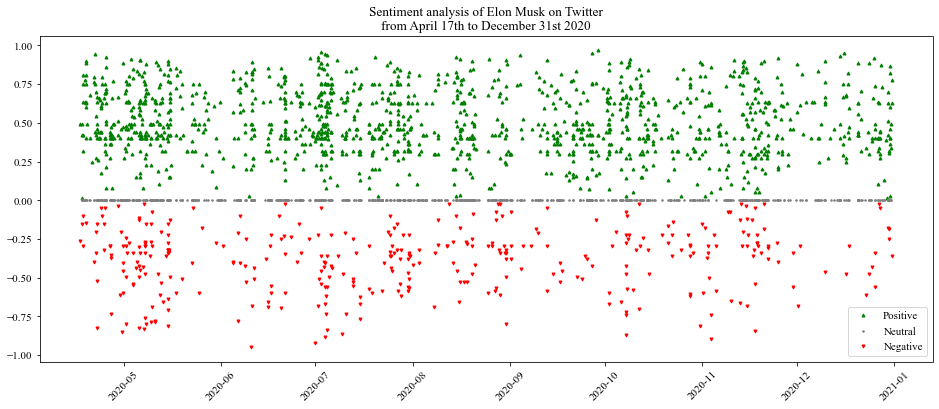

In [7]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = '11'

cmp = df['compound']
mask = cmp >= 0.01
mask2 = cmp == 0.00
mask3 = cmp <= -0.01

fig = plt.figure(figsize=(16,6)) 

plt.plot(cmp[mask],'^',color='green',markersize=3,label='Positive')
plt.plot(cmp[mask2],'.',color='grey',markersize=3,label='Neutral')
plt.plot(cmp[mask3],'v',color='red',markersize=3,label='Negative')
plt.title('Sentiment analysis of Elon Musk on Twitter\nfrom April 17th to December 31st 2020')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Tweets are mostly positive

By displaying tweets according to their sentiment scores, we can observe that Elon Musk is posting **more positive tweets** (in green triangle) than negative tweets (in red triangle). Even more interesting, we can also see a clear grey line of tweets with neutral scores. 

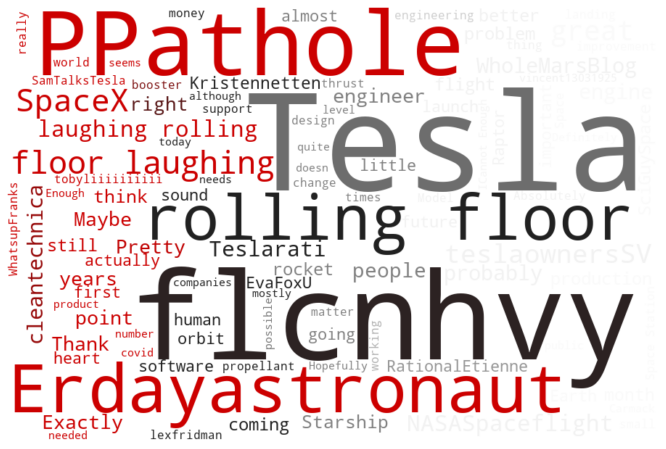

In [8]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image

maskt = np.array(Image.open("TSLA-HEXA.png")) 
image_colors = ImageColorGenerator(maskt)
text = " ".join(review for review in df['cleaned_tweet'])
wordcloud = WordCloud(background_color="white", mode="RGBA", mask=maskt, max_words=100, min_word_length=5).generate(text)
fig = plt.figure(figsize=(15, 8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show() 

## Word Cloud

The word cloud give us a great sense of his interactions. **Tesla and Space X remains his main focus** on Twitter. Musk is speaking with Tesla, A.I or space enthusiasts such as **Viv** *(flcnhvy)*, **Pranay Pathole** *(PPathole)*, **Eric Berger** *(SciGuySpace)*, or **Tim Dodd** *(erdayastronaut)* of various audience size from 37K to 330K followers. The interactions are genuine and sometimes highly technical. The most used emojis have all a positive connotation. 

So what about the best performing tweets from April to December of 2020?

In [9]:
df.iloc[df['retweet_count'].argsort()[-6:]]

,tweet,retweet_count,likes_count,reply_count,quote_count,cleaned_tweet,neg,neu,pos,compound
created_at,,,,,,,,,,
2020-09-26 23:39:31+00:00,https://t.co/r1Sox7vta8,115646,681206,6508,5639,,0.000,0.000,0.0,0.0000
2020-06-26 07:35:57+00:00,"Who controls the memes,\ncontrols the Universe",116017,731366,15847,10634,"Who controls the memes, controls the Universe",0.000,1.000,0.0,0.0000
2020-05-13 07:34:10+00:00,https://t.co/lQWpSwtRj7,128664,653208,5356,5073,,0.000,0.000,0.0,0.0000
2020-06-26 06:05:19+00:00,https://t.co/e9dPKVSjjl,133864,860563,6625,8037,,0.000,0.000,0.0,0.0000
2020-07-05 01:20:09+00:00,https://t.co/jAmuz6NaA4,144345,694534,16741,15177,,0.000,0.000,0.0,0.0000
2020-06-06 07:06:09+00:00,Selling weed literally went from major felony ...,153324,697962,12080,11481,Selling weed literally went from major felony ...,0.201,0.799,0.0,-0.7783


## Observations on top tweets

"*Selling weed literally went from major felony to essential business (open during pandemic) in much of America & yet many are still in prison. Doesn’t make sense, isn’t right.*" Elon Musk, Jun 6, 2020

-	The most viral tweet is a **social critic** of the marijuana legalization in USA with a high negative score for Vader. On a human level, this tweet can be view as anti-establishment and the sentiment probably vary according to your personal views.


- **Memes are the most viral tweets** on Retweets and Likes. Memes are about video games (*Grand Theft Auto 5 or Cyberpunk 2077*), about politics or life during the pandemic with references to Japanese or American animation.


- The top max values for **“Quote count”** of Elon Musk are tweets in short text format about polarizing social issues with a highly negative rate on Vader (see data frame below). If you do a back search on those tweets, you will found them as a source on many media outlets.

In [10]:
df.iloc[df['quote_count'].argsort()[-3:]]

,tweet,retweet_count,likes_count,reply_count,quote_count,cleaned_tweet,neg,neu,pos,compound
created_at,,,,,,,,,,
2020-05-11 20:36:52+00:00,Tesla is restarting production today against A...,65482,468454,31626,26349,Tesla is restarting production today against A...,0.107,0.893,0.000,-0.4767
2020-04-29 06:14:53+00:00,FREE AMERICA NOW,52840,323139,46242,29992,FREE AMERICA NOW,0.000,0.377,0.623,0.5106
2020-11-13 05:47:11+00:00,Something extremely bogus is going on. Was tes...,102691,429062,38371,41054,Something extremely bogus is going on. Was tes...,0.097,0.809,0.094,-0.0258


## Conclusion

Since last December, Elon Musk posted many Memes, went from 42 to 47 million followers on Twitter, Tesla’s stock price reached a new record high, and he became the richest man on the planet. Rather than using a traditional marketing approach, the American CEO is not using the basic storytelling playbook, but instead an open dialogue on Twitter to connect with loyal followers, Tesla owners, space enthusiasts, tech insiders, and retail investors. 


Tesla is showcasing all the elements of a premium brand with an iconic CEO, global brand equity, vertical integration, and limited items at premium price. Created as a response to short sellers, the **“Tesla Short short”** went viral and sold out in matters of minutes. The **“Tesla Tequila”** priced at `$250` a bottle is now selling on eBay for as high as `$2,500.` 

Similar to provocative modern designers, Elon Musk is producing lifestyle items as a response to the establishment with sarcasm, irony and pop-culture references for his community. Scarcity is not created by the inherent qualities of the items but by the high viral coefficient and limited quantities. While news are disappearing over time, the Tesla tequila became a **speculative asset**. And even better, the Tesla short short became a **powerful message** for retail investors, and a warning message for hedge funds. 

**Memes are NEVER about Tesla or Space X but clearly for fun**. Often based on a global cultural phenomenon, memes can be understood without much words by a very large audience around the world. Memes are talking about our present lives using a pastiche aesthetic, blended with a nostalgia feeling of the 80/90's. There is a dichotomy, one of the most innovative CEO of our days is not inspired by creating a futuristic new design, but rather by a retro futurist look. 


On the business side, the 5-for-1 stock split was perfectly timed with many positive news. Tesla beat estimates of vehicle productions and deliveries during the pandemic. The mission of SpaceX's crew Dragon on the Falcon 9 was a success. And the jokes on the short-sellers and the S.E.C didn't impact the financials of the company. Despite being one of the leader in the luxury brand segment, Elon Musk wants to constantly lower the price of cars and stock for a larger adoption rate. For momentum investing, Elon Musk can hype a stock in one tweet or one meme on the short term horizon. In 2020/21, we saw **Etsy** `(+9%)`, **Signal** `(+11,708%)`, **CD Projekt RED** `(+13%)`, **GameStop** `(+60%)`, **Bitcoin** `(+15%)`, **DogeCoin** `(+420.29%` in one day) and **Clubhouse** `(+100%)` skyrocketed for 24/48 hours. On GitHub, you will found dozen trading algorithms tracking Elon Musk's Twitter feed to movements of stocks or cryptocurrencies. 

Sentiment analysis using natural language processing is far from perfect. Depending where you learn about Elon Musk, you will have two different Elon Musk. If you are reading traditional media, you will probably discover polarizing stories about his problems with covid-19 testing or confrontations with the S.E.C that are highly engaging due to their negative scores. If you are following Elon Musk on Twitter, you will discover positive stories of a CEO that is replying to his followers on Twitter, talking passionately about space exploration and having fun by posting Memes. 

Elon Musk is clearly winning on the digital space as he explained: **"Who controls the memes, controls the Universe".** 


Thank you for reading!

Please feel free to contact me if you have any questions.

**Akim Mousterou**

*** 

**Disclaimer**: *This is for research purposes only, I have already delete the Twitter dataset. I am not working for Tesla. I don't own shares of TSLA, nor a Tesla car. None of the content published on this notebook constitutes a recommendation that any particular security, portfolio of securities, transaction, or investment strategy is suitable for any specific person. None of the information providers or their affiliates will advise you personally concerning the nature, potential, value, or suitability of any particular security, portfolio of securities, transaction, investment strategy, or other matter.*